In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

home_data = pd.read_csv('C:/Users/user/Desktop/shell/engineerProject/home-data-for-ml-course/train.csv')

# Create target object and call it y
y = home_data['SalePrice']

# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF',
            '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# val_size is set to 0.25 as default
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# print(home_data['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [6]:
# Define the model
XGB_model = XGBRegressor(
    n_estimators=1000, eta=0.01, max_depth=4, subsample=0.6, colsample_bytree=0.9)

# Fit the model
XGB_model.fit(train_X, train_y)

# Get predictions
predictions = XGB_model.predict(val_X)

In [7]:
# Calculate MAE
mae = mean_absolute_error(val_y, predictions)
mse = mean_squared_error(val_y, predictions)
msle = mean_squared_log_error(val_y, predictions)

# Uncomment to print MAE
print("\nMean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Mean Squared Log Error:", msle)


Mean Absolute Error: 21015.085744863012
Mean Squared Error: 904056369.2747569
Mean Squared Log Error: 0.03259193760013694


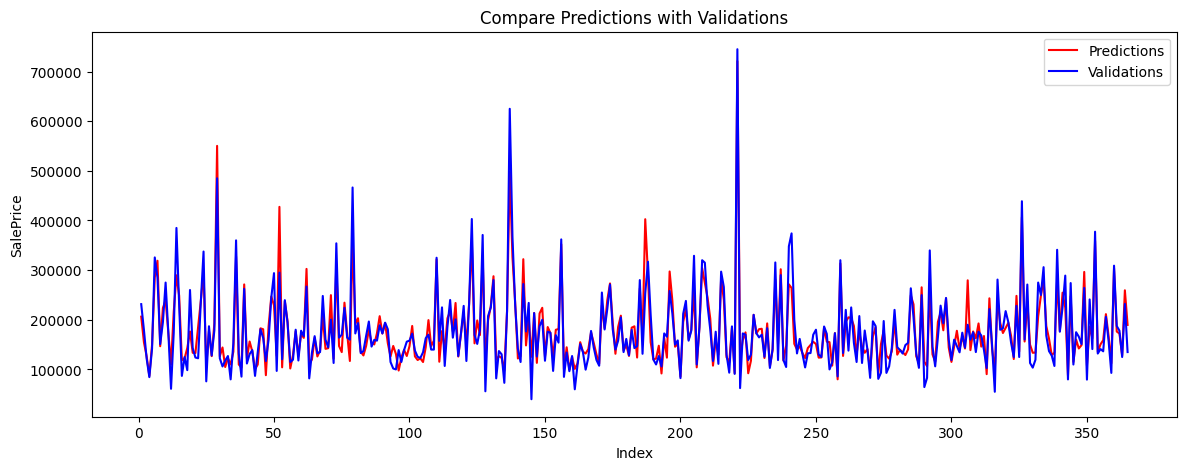

In [8]:
quantity = np.arange(1, len(predictions)+1)
fig = plt.figure(figsize=(14, 5))
plt.plot(quantity, predictions, 'r')
plt.plot(quantity, val_y, 'b')
plt.title('Compare Predictions with Validations')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend(['Predictions', 'Validations'])
plt.show()